In [ ]:
#requirement the libaray 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#load the data set
df = pd.read_excel("Sales_Data.xlsx")

# **Describe the data set**

In [ ]:
#how to check header section
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [ ]:
df.shape

(2747, 20)

The sales dataset contains 2747 rows and 20 columns

# Basic Summary

In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

We have some unnecessary columns 'ADDRESSLINE1','POSTALCODE', 'PHONE'. We can drop them. Instead of using 'CITY' we can use 'COUNTRY' only. So, we can drop 'CITY' , 'STATE' also. We have 'CUSTOMERNAME', 'CONTACTFIRSTNAME' and 'CONTACTLASTNAME'. We can remove 'CONTACTFIRSTNAME' and 'CONTACTLASTNAME

In [ ]:
# Dropping Unnecessary columns 
drop_column=['ADDRESSLINE1','POSTALCODE',  'PHONE', 'CITY' ,'CONTACTFIRSTNAME', 'CONTACTLASTNAME' ]
df.drop(drop_column,axis=1,inplace=True)

In [ ]:
#how to check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  COUNTRY               2747 non-null   object        
 13  DEALSIZE          

In [ ]:
#how to check data types
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
COUNTRY                         object
DEALSIZE                        object
dtype: object

# Describe stats 
# prints the summary statistic of the numerical variables 

In [ ]:

df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098951,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042548,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


This is the important summary statistics of all the numerical variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation. It also provides the IQR using the 25th 5oth and 75th percentile values.

In [ ]:
# check null values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
COUNTRY                 0
DEALSIZE                0
dtype: int64

The Dataset contains no null values

In [ ]:
#how to check skew
df.skew(numeric_only=True)

ORDERNUMBER            -0.006995
QUANTITYORDERED         0.369286
PRICEEACH               0.697222
ORDERLINENUMBER         0.575327
SALES                   1.155940
DAYS_SINCE_LASTORDER   -0.002983
MSRP                    0.575646
dtype: float64

Most of the values having moderately skewed distribution

In [ ]:
#Summary Statistics of quantitative variables
quantitative_vars = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
df[quantitative_vars].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000
mean,35.103021,101.098951,3553.047583,100.691664
std,9.762135,42.042548,1838.953901,40.114802
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.745000,2204.350000,68.000000
50%,35.000000,95.550000,3184.800000,99.000000
75%,43.000000,127.100000,4503.095000,124.000000
max,97.000000,252.870000,14082.800000,214.000000


There is no negative value for each of the quantitative variables. It is a good sign because we cannot have negative prices or quantities

# Univarate Analysis

In [ ]:
df['PRODUCTLINE'].value_counts()

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

**SALES**

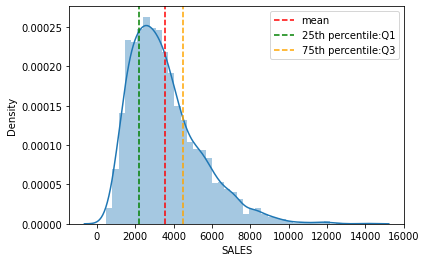

In [ ]:
sns.distplot(df['SALES'])
plt.axvline(x=np.mean(df['SALES']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['SALES'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['SALES'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

The rating distribution seems to be  skewness on the left side of the distribution. We can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th percentiles respectively.The mean rating is ~3600.

Classic Cars        949
Vintage Cars        579
Motorcycles         313
Planes              304
Trucks and Buses    295
Ships               230
Trains               77
Name: PRODUCTLINE, dtype: int64

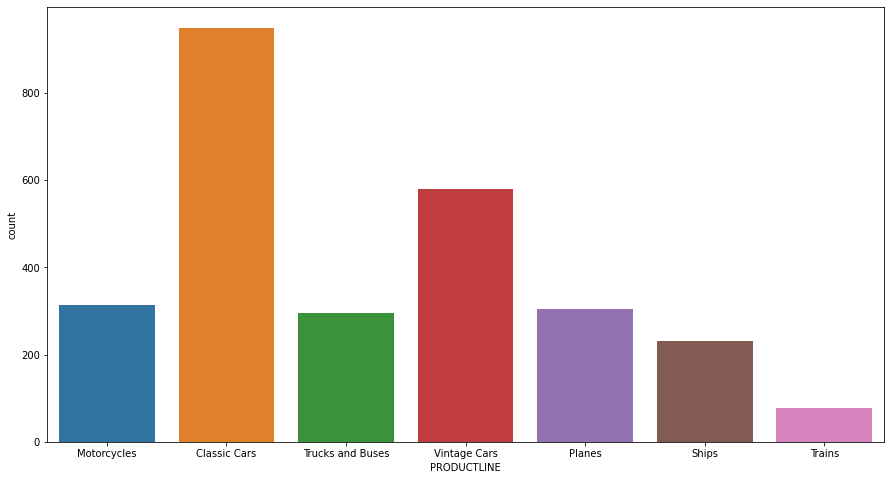

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['PRODUCTLINE'])
df['PRODUCTLINE'].value_counts()

From this plot we can see that Most ordered products are Classic cars.Vintage Cars comes next and Least ordered product is Trains.

**QUANTITY ORDERED**

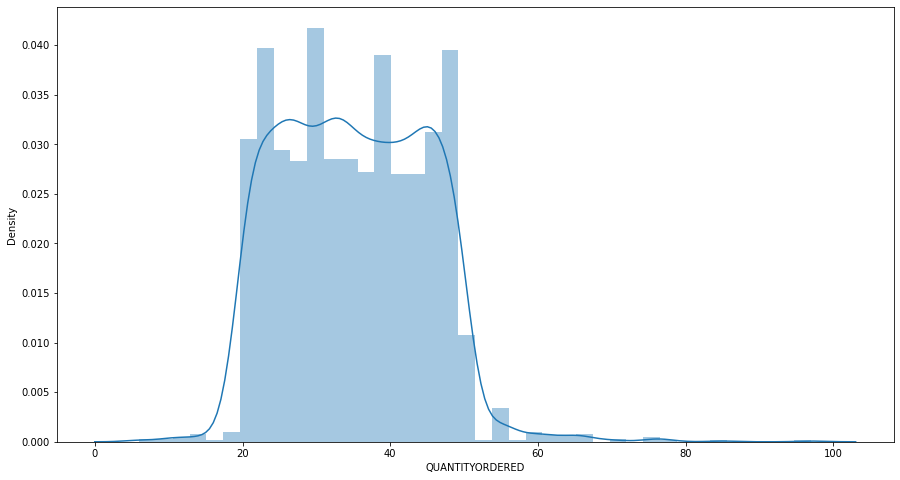

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df['QUANTITYORDERED'])
# plt.title('Order Quantity Distribution')
# plt.xlabel('Quantity Ordered')
# plt.ylabel('Frequency')
plt.show()

From the above plot, we can infer that there are bulk orders. Majority of the order's quantity are between 20  to 50 units.

PRICEEACH

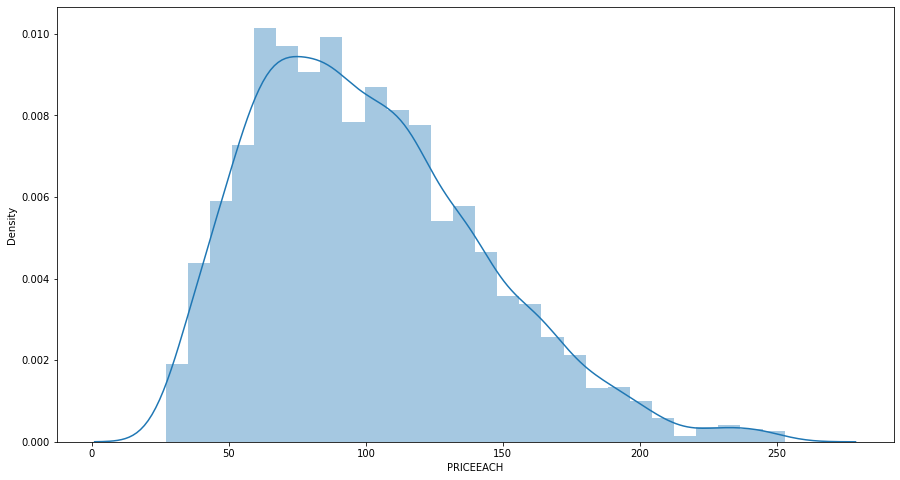

In [ ]:
plt.figure(figsize=(15,8))
sns.distplot(df['PRICEEACH'])

plt.show()

From the plot we can see that most of the orders are received in the price between 60 to 100

**STATUS**

Shipped       2541
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

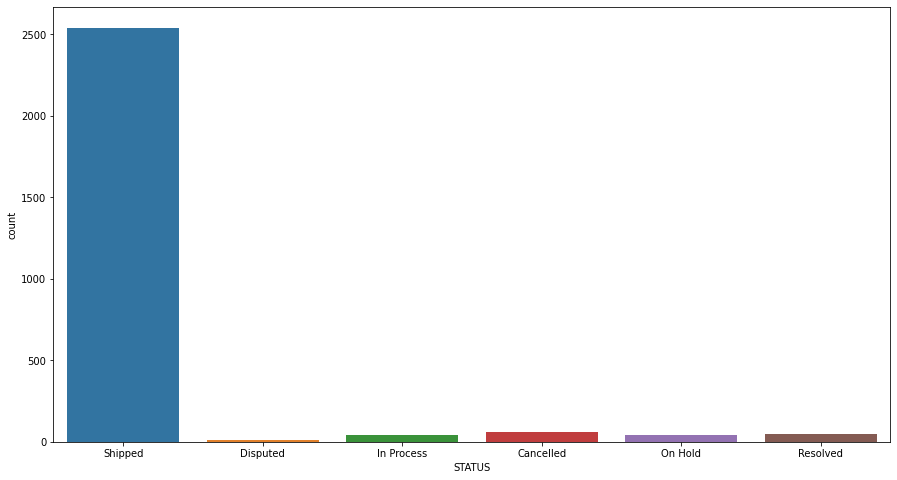

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['STATUS'])
df['STATUS'].value_counts()

From the plot we can see that most of the orders are shipped

**DEALSIZE**

Medium    1349
Small     1246
Large      152
Name: DEALSIZE, dtype: int64

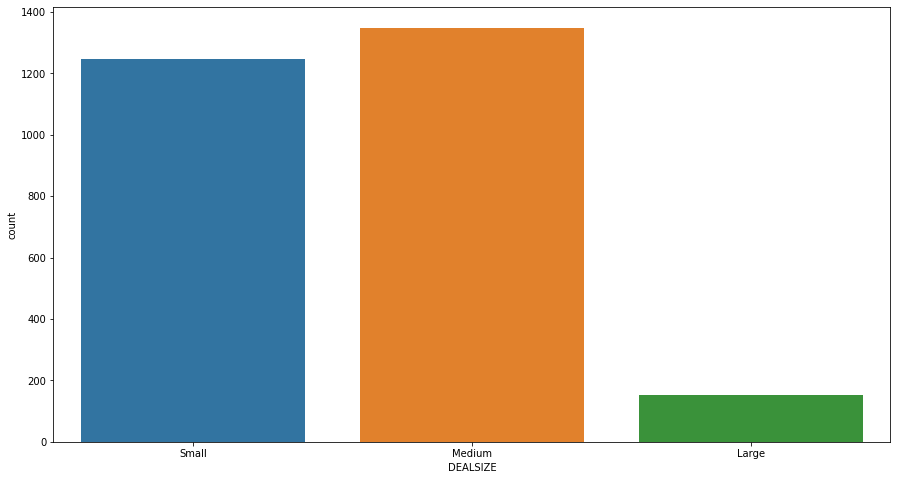

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(df['DEALSIZE'])
df['DEALSIZE'].value_counts()

In [ ]:
	
df_sorted= df.sort_values('SALES',ascending=False)

Text(0, 0.5, 'Sales')

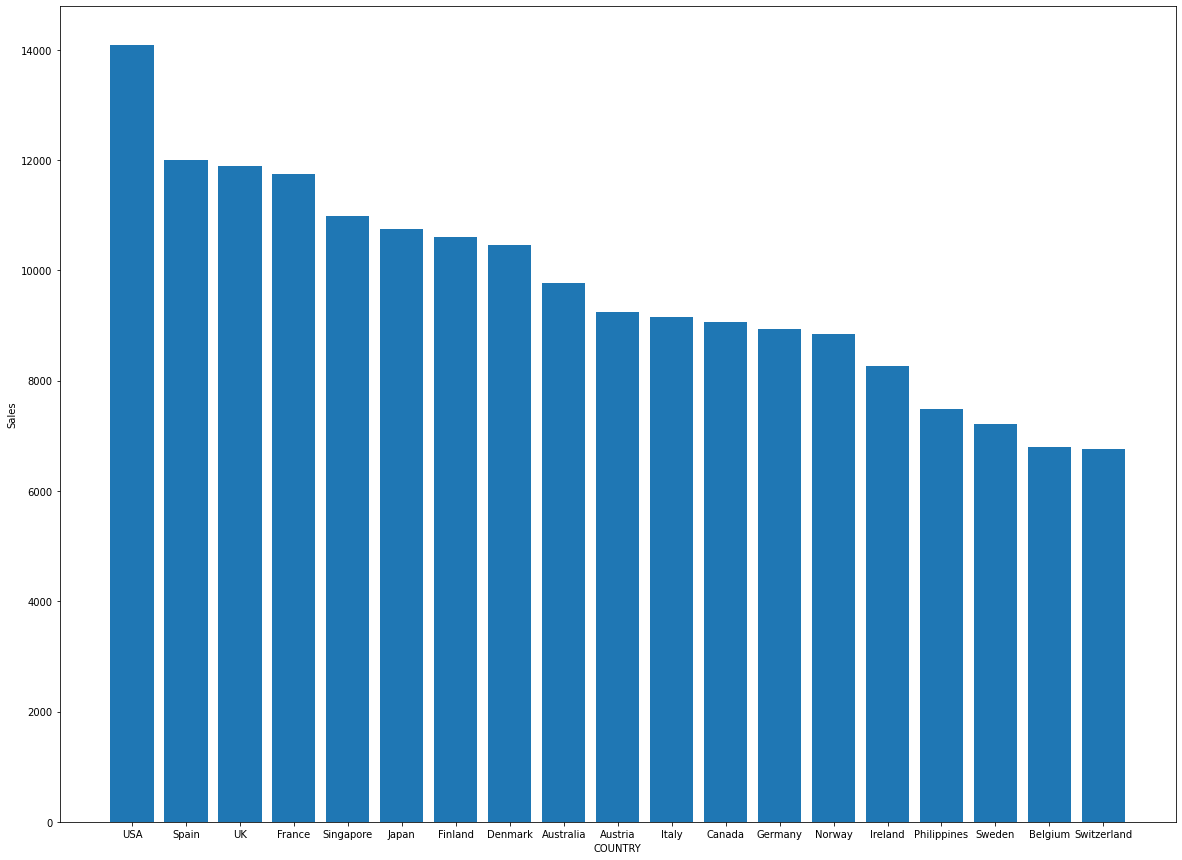

In [ ]:
#bar plot
plt.figure(figsize=(20, 15))
plt.bar('COUNTRY', 'SALES', data=df_sorted)
# plt.bar(df['COUNTRY'], df['SALES'])
plt.xlabel('COUNTRY')
plt.ylabel('Sales')

From the plot we can see that most of the sales are there in USA, followed by Spain,UK and France. Least sales in Switzerland

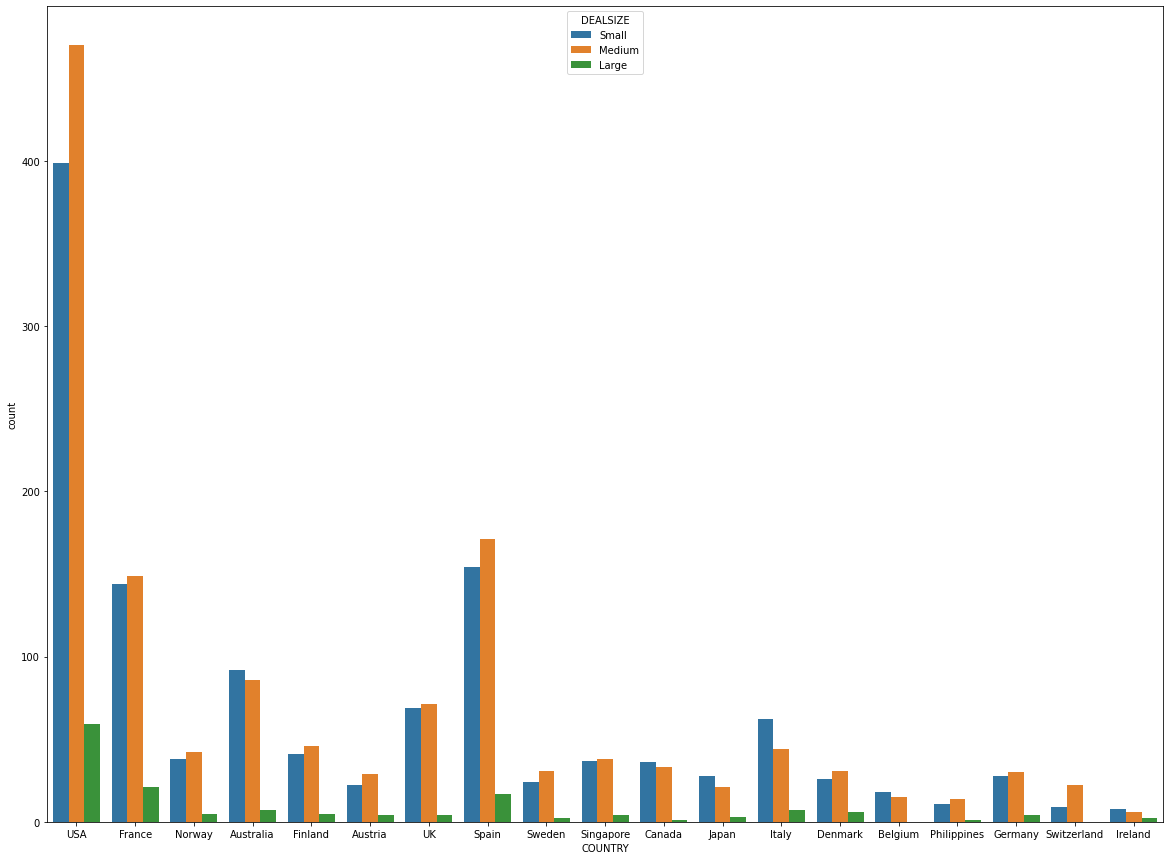

In [ ]:
fig1, ax1 = plt.subplots(figsize=(20,15))
sns.countplot(df['COUNTRY'],hue=df['DEALSIZE'])

PRODUCT AND ORDERED QUANTITY

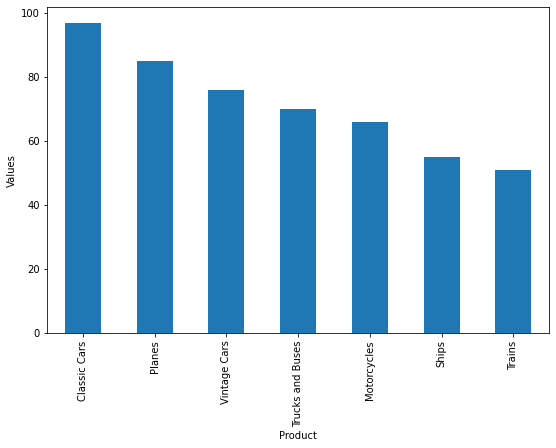

In [ ]:
plt.figure(figsize=(9,6))
df.groupby(['PRODUCTLINE'])['QUANTITYORDERED'].max().sort_values(ascending = False).plot(kind = 'bar')

plt.xlabel('Product')
plt.ylabel('Values')
plt.show()

The plot shows the top products by the quantity of order are classic cars and planes. The planes were not one of the top-performing products in terms of number of orders but make up for it in terms off the quantity of each order

# **MULTIVARIATE ANALYSIS**

In [ ]:
# Create new columns
df['DAY'] = df['ORDERDATE'].dt.day
df['MONTH'] = df['ORDERDATE'].dt.month
df['YEAR'] = df['ORDERDATE'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  COUNTRY               2747 non-null   object        
 13  DEALSIZE          

**Checking for time frame of the data**

In [ ]:
df.groupby(['YEAR'])['MONTH'].nunique()

YEAR
2018    12
2019    12
2020     5
Name: MONTH, dtype: int64

In [ ]:
df['YEAR'].value_counts()

2019    1329
2018     953
2020     465
Name: YEAR, dtype: int64

**Annual Sales**

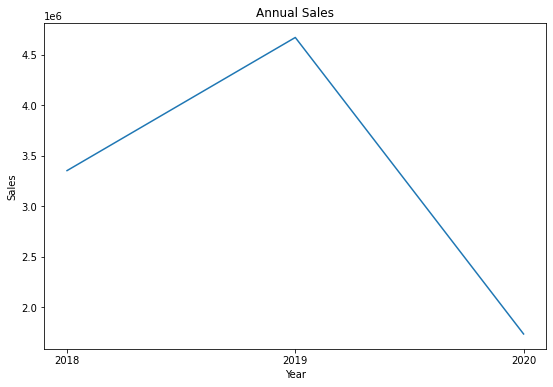

In [ ]:

plt.figure(figsize=(9,6))
df.groupby(['YEAR'])['SALES'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Annual Sales')
plt.xticks(np.arange(2018,2021,1))
plt.show()

2020 has incomplete data, monthly data will be used for further analysis

**MONTHLY SALES**

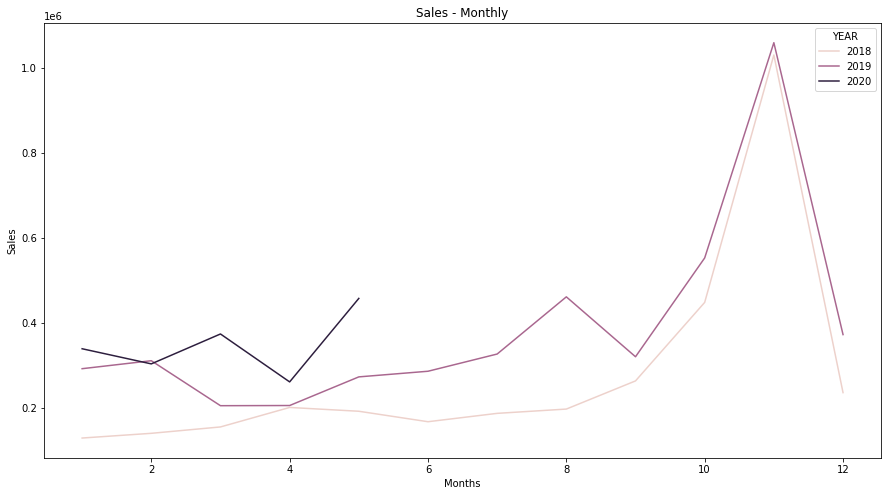

In [ ]:

plt.figure(figsize=(15,8))

revenue_month = df.groupby(['YEAR','MONTH'])['SALES'].sum().reset_index()

sns.lineplot(x="MONTH", y="SALES",hue="YEAR", data=revenue_month)
plt.xlabel('Months')
plt.ylabel('Sales')
plt.title('Sales - Monthly')
plt.show()

This is clearly shows that the revenue is growing in October and November. It can be the result of the festivals ansd holidays. We can also observe that 2020 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). The reason behind this spike of sales in 2020 can be further investigated to maintain high sales in future.

**QUARTERLY SALES**

In [ ]:

# quarter = pd.Timestamp(dt.date(2016, 2, 29)).quarter
quarter = pd.PeriodIndex(df['ORDERDATE'], freq='Q-MAR').strftime('Q%q')
df['QUARTER'] = df['ORDERDATE'].dt.quarter

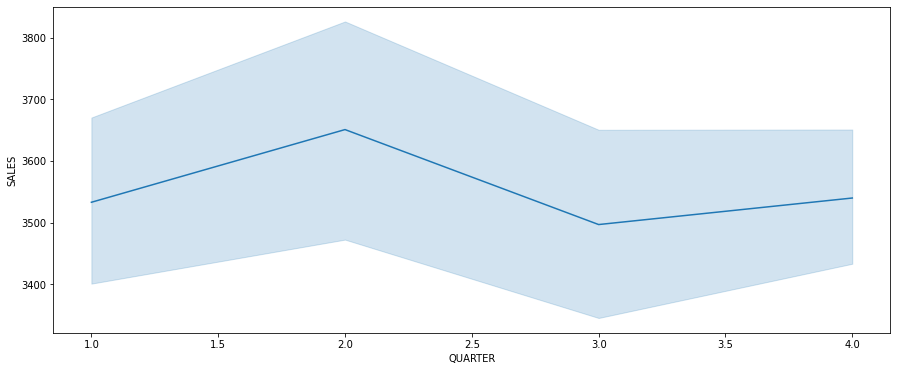

In [ ]:
#how to visulize the Quartely analysis 
plt.figure(figsize=(15,6))
sns.lineplot(x='QUARTER',y='SALES', data=df)
plt.show()

In this plot we can see the most of the sales are there in second qurater. There is increase the sales from quarter 1 to 2 after that sales decreasing till 3rd quarter.After 3rd qurater there is slight increase in the sales.

Testing for Correlation within variables

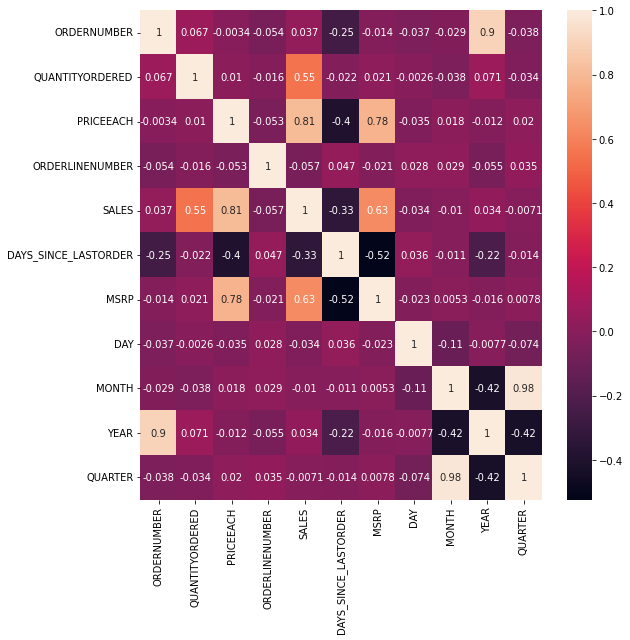

In [ ]:
plt.figure(figsize = (9,9))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

There is a positively correlated between SALES, QUANTITYORDERED, PRICEEACH and MSRP. This means The higher the price of product the more orders it recieves and the quantities ordered the more the sales generated

# **RFM ANALYSIS**

FOR Sales analysis We need only columns 'CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE' and 'SALES'

In [ ]:
new_columns=['CUSTOMERNAME', 'ORDERNUMBER', 'ORDERDATE', 'SALES']
Analysis_data=df[new_columns]


In [ ]:
Analysis_data.head()

,CUSTOMERNAME,ORDERNUMBER,ORDERDATE,SALES
0,Land of Toys Inc.,10107,2018-02-24,2871.00
1,Reims Collectables,10121,2018-05-07,2765.90
2,Lyon Souveniers,10134,2018-07-01,3884.34
3,Toys4GrownUps.com,10145,2018-08-25,3746.70
4,Technics Stores Inc.,10168,2018-10-28,3479.76


In [ ]:
# the most recent date in the entire dataset
most_recent = Analysis_data['ORDERDATE'].max()
most_recent

# NOW = rfm_data['ORDERDATE'].max()  # Most recent date
RFM=Analysis_data.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (most_recent - x.max()).days, # Recency
                                                'ORDERNUMBER': lambda x: len(x.unique()), # Frequency
                                                'SALES': lambda x: x.sum()})    # Monetary 

RFM['ORDERDATE'] = RFM['ORDERDATE'].astype(int)

RFM.rename(columns={'ORDERDATE': 'Recency', 
                         'ORDERNUMBER': 'Frequency',
                         'SALES': 'Monetary'}, inplace=True)
RFM.head()

,Recency,Frequency,Monetary
CUSTOMERNAME,,,
"AV Stores, Co.",196,3,157807.81
Alpha Cognac,64,3,70488.44
Amica Models & Co.,265,2,94117.26
"Anna's Decorations, Ltd",83,4,153996.13
Atelier graphique,188,3,24179.96


In [ ]:
rfm_df = RFM.copy()

In [ ]:
rfm_df.reset_index(inplace=True)

In [ ]:
quantile_value = rfm_df.quantile([0.25,0.50,0.75])
quantile_value

,Recency,Frequency,Monetary
0.25,75.0,2.0,70488.44
0.50,184.0,3.0,87489.23
0.75,230.0,3.0,120562.74


In [ ]:
def quantile_classes(x, quantile_value, rfm_attr):
    if rfm_attr == 'Recency':
        if x <= quantile_value[rfm_attr][0.25]: # Recency is less than 0.25%
            return 4
        elif x >= quantile_value[rfm_attr][0.25] and x <= quantile_value[rfm_attr][0.50]:# Recency is larger than 25% and less 75%
       
            return 3
        elif x >= quantile_value[rfm_attr][0.50] and x <= quantile_value[rfm_attr][0.75] :# Recency is larger than 50% and less 75%
            return 2
        else:
            return 1
    else:
        #freqency and monetary 
        if x <= quantile_value[rfm_attr][0.25]: # freqency/monetary is less than 0.25%
            return 1
        elif x >= quantile_value[rfm_attr][0.25] and x <= quantile_value[rfm_attr][0.50]: # freqency/monetary is larger than 25% and less 75%
            return 2
        elif x >= quantile_value[rfm_attr][0.50] and x <= quantile_value[rfm_attr][0.75] : # freqency/monetary is larger than 50% and less 75%
            return 3
        else:
            return 4


In [ ]:
     

#convert rfm table raw value to class 
rfm_df['R_quartile'] = rfm_df['Recency'].apply(quantile_classes, args = (quantile_value,'Recency'))
rfm_df['F_quartile'] = rfm_df['Frequency'].apply(quantile_classes, args = (quantile_value,'Frequency'))
rfm_df['M_quartile'] = rfm_df['Monetary'].apply(quantile_classes, args = (quantile_value,'Monetary'))

rfm_df.head()

,CUSTOMERNAME,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,"AV Stores, Co.",196,3,157807.81,2,2,4
1,Alpha Cognac,64,3,70488.44,4,2,1
2,Amica Models & Co.,265,2,94117.26,1,1,3
3,"Anna's Decorations, Ltd",83,4,153996.13,3,4,4
4,Atelier graphique,188,3,24179.96,2,2,1


In [ ]:
rfm_df['RFMClass_combined'] = rfm_df['R_quartile'].astype(str) + rfm_df['F_quartile'].astype(str) + rfm_df['M_quartile'].astype(str)

In [ ]:
rfm_df

,CUSTOMERNAME,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMClass_combined
0,"AV Stores, Co.",196,3,157807.81,2,2,4,224
1,Alpha Cognac,64,3,70488.44,4,2,1,421
2,Amica Models & Co.,265,2,94117.26,1,1,3,113
3,"Anna's Decorations, Ltd",83,4,153996.13,3,4,4,344
4,Atelier graphique,188,3,24179.96,2,2,1,221
...,...,...,...,...,...,...,...,...
84,"Vida Sport, Ltd",275,2,117713.56,1,1,3,113
85,Vitachrome Inc.,208,3,88041.26,2,2,3,223
86,"Volvo Model Replicas, Co",194,4,75754.88,2,4,2,242
87,West Coast Collectables Co.,488,2,46084.64,1,1,1,111


# **Who are your best customers (at least 5)**

In [ ]:
#Who are my best customers? (BY RFMClass_combined = 444)
best5_customer=rfm_df[rfm_df['RFMClass_combined']=='444'].sort_values('Monetary', ascending=False).head(5)
display(best5_customer)

,CUSTOMERNAME,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMClass_combined
32,Euro Shopping Channel,0,26,912294.11,4,4,4,444
53,Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
43,La Rochelle Gifts,0,4,180124.90,4,4,4,444
78,The Sharp Gifts Warehouse,39,4,160010.27,4,4,4,444
72,Souveniers And Things Co.,2,4,151570.98,4,4,4,444


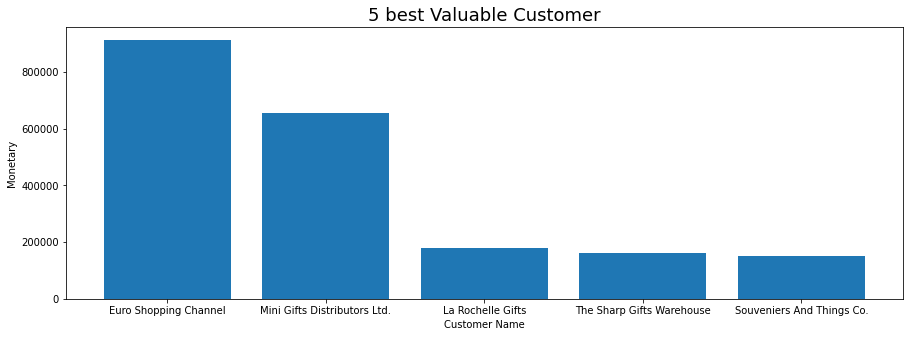

In [ ]:
plt.figure(figsize = (15,5))
plt.title('5 best Valuable Customer', fontsize = 18)
plt.bar(best5_customer['CUSTOMERNAME'], best5_customer['Monetary'], linewidth = 1)
plt.xlabel('Customer Name')
plt.ylabel('Monetary')
plt.show()

**Best customers**

The biggest customers with high (4,4,4) values in all three factors such as Recency,Frequency and Monetary that should be targeted with special promotions to keep them active.

**The 5 best customers are:**

 * Euro Shopping Channel 

 *  Mini Gifts Distributors Ltd.	

 * La Rochelle Gifts	

 * The Sharp Gifts Warehouse

 * Souveniers And Things Co.	

# **which customer are on the verge of churning at least (5)**

In [ ]:
#Which customers are at the verge of churning?
#Customers who's recency value is low

churn_customer=rfm_df[rfm_df['R_quartile'] <= 2 ].sort_values('Monetary', ascending=False).head(5)
display(churn_customer)

,CUSTOMERNAME,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMClass_combined
44,Land of Toys Inc.,198,4,164069.44,2,4,4,244
0,"AV Stores, Co.",196,3,157807.81,2,2,4,224
68,"Saveley & Henriot, Co.",456,3,142874.25,1,2,4,124
64,Rovelli Gifts,201,3,137955.72,2,2,4,224
57,Online Diecast Creations Co.,209,3,131685.30,2,2,4,224


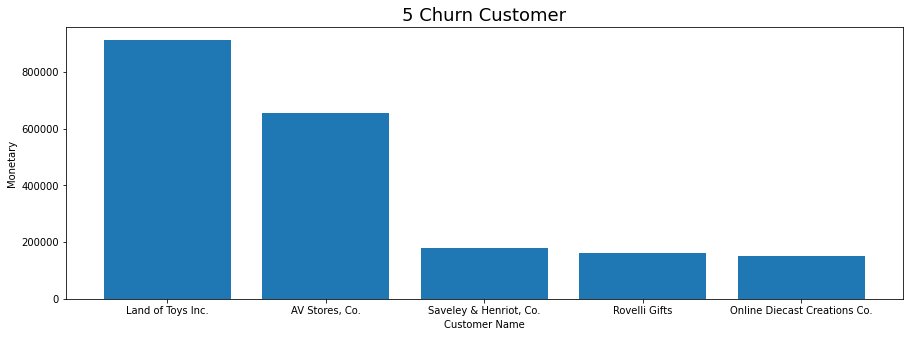

In [ ]:
plt.figure(figsize = (15,5))
plt.title('5 Churn Customer', fontsize = 18)
plt.bar(churn_customer['CUSTOMERNAME'], best5_customer['Monetary'], linewidth = 1)
plt.xlabel('Customer Name')
plt.ylabel('Monetary')
plt.show()

The customers are at the verge of churning are the customers who's Recency value is low.

The 5 customers at the verge of churning are:

* Land of Toys Inc.
* AV Stores, Co
* Saveley & Henriot, Co.
* Rovelli Gifts
*	Online Diecast Creations Co.	

# **who are you lost customer (give at least 5)**

In [ ]:
#Who are lost customers?
#Customers who's Recency, Frequency as well as Monetary values are low (RFMClass_combined==111)

lost_customer=rfm_df[rfm_df['RFMClass_combined']=='111'].sort_values('Monetary',ascending=False).head(5)
display(lost_customer)

,CUSTOMERNAME,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMClass_combined
25,Daedalus Designs Imports,465,2,69052.41,1,1,1,111
59,Osaka Souveniers Co.,414,2,67605.07,1,1,1,111
8,Auto Assoc. & Cie.,233,2,64834.32,1,1,1,111
20,"Clover Collections, Co.",258,2,57756.43,1,1,1,111
58,Online Mini Collectables,264,2,57197.96,1,1,1,111


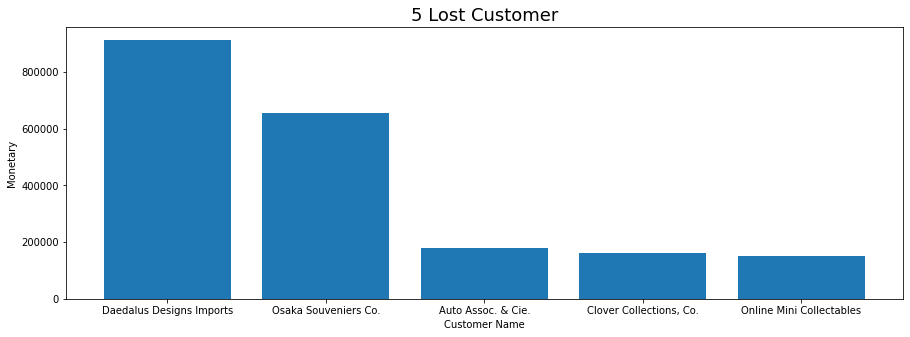

In [ ]:
plt.figure(figsize = (15,5))
plt.title('5 Lost Customer', fontsize = 18)
plt.bar(lost_customer['CUSTOMERNAME'], best5_customer['Monetary'], linewidth = 1)
plt.xlabel('Customer Name')
plt.ylabel('Monetary')
plt.show()

**Lost customers**

Customers who's recency, frequency as well as monetary values are low

The 5 Lost customers are:

* Daedalus Designs Imports
* Osaka Souveniers Co.
* Auto Assoc. & Cie.
* Clover Collections, Co.	
*	Online Mini Collectables

# **who are you loyal customers (give at least 5)**

In [ ]:
#Who are your loyal customers?
#Customers with high Frequency value

loyal_customer=rfm_df[rfm_df['F_quartile'] >= 3 ].sort_values('Monetary', ascending=False).head(5)
display(loyal_customer)

,CUSTOMERNAME,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFMClass_combined
32,Euro Shopping Channel,0,26,912294.11,4,4,4,444
53,Mini Gifts Distributors Ltd.,2,17,654858.06,4,4,4,444
6,"Australian Collectors, Co.",184,5,200995.41,3,4,4,344
55,Muscle Machine Inc,182,4,197736.94,3,4,4,344
43,La Rochelle Gifts,0,4,180124.90,4,4,4,444


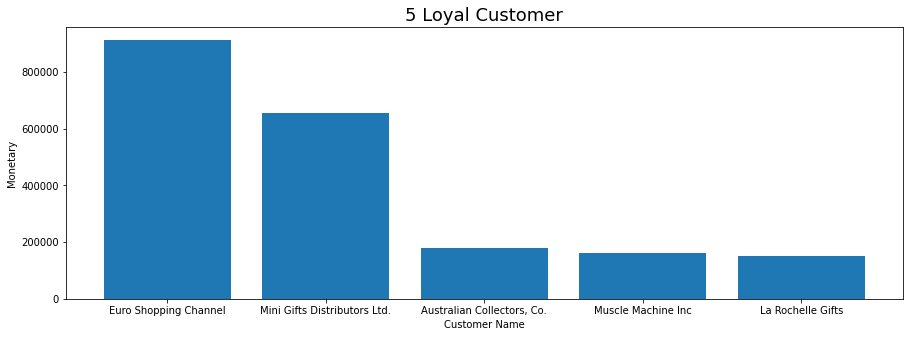

In [ ]:
plt.figure(figsize = (15,5))
plt.title('5 Loyal Customer', fontsize = 18)
plt.bar(loyal_customer['CUSTOMERNAME'], best5_customer['Monetary'], linewidth = 1)
plt.xlabel('Customer Name')
plt.ylabel('Monetary')
plt.show()

**Loyal customers**

Customers with high frequency value (Returning Customers)

The 5 Lost customers are:

* Euro Shopping Channel
* Mini Gifts Distributors Ltd.	
* Australian Collectors, Co.
* Muscle Machine Inc
*	La Rochelle Gifts	